# Decision Tree 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
import os
os.chdir(r"C:\Users\goldlab\OneDrive - seoultech.ac.kr\대학\2020-1\3. 데이터마이닝\프로젝트\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [3]:
# dataset 소환
data = pd.read_csv(r'./heart-disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# y 기준 내림차순 정렬
data.sort_values(by="target", ascending=True, inplace=True)

# index 재설정
data = data.reset_index(drop=True)

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
1,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
2,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
3,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
4,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
299,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
300,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
301,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1


In [6]:
# target data 이름 넣기 #
target_att = 'target'

X = data.loc[:, data.columns != target_att]
y = data.loc[:, data.columns == target_att]

In [7]:
np.unique(data['target'])

array([0, 1], dtype=int64)

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,0,1,130,236,0,0,174,0,0.0,1,1,2
1,44,1,0,110,197,0,0,177,0,0.0,2,1,2
2,60,1,0,125,258,0,0,141,1,2.8,1,1,3
3,58,1,0,150,270,0,0,111,1,0.8,2,0,3
4,68,1,2,180,274,1,0,150,1,1.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,43,1,2,130,315,0,1,162,0,1.9,2,1,2
299,52,1,0,108,233,1,1,147,0,0.1,2,3,3
300,62,0,0,140,394,0,0,157,0,1.2,1,0,2
301,45,0,1,112,160,0,1,138,0,0.0,1,0,2


In [9]:
# 기존 sklearn에 구현된 모델용 설정 # 

## y의 name 
target_att = 'target'

## x의 name
in_feature = list(data.columns [data.columns != target_att])

## data column 중 categorical variable 찾기
cate_col = [col for col in in_feature if not np.issubdtype(X[col].dtype, \
    np.number)]

## X의 string 값을 dummey variable로 변환 
X_dummies= pd.get_dummies(X.loc[:,in_feature], columns=cate_col)
feature_names = X_dummies.columns

## y의 string 값을 numeric으로 변환 
y, class_names = pd.factorize(data[target_att])

from sklearn.model_selection import train_test_split  
## train, test = 8:2, random split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, )

In [10]:
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [11]:
y, class_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
130,50,1,0,144,200,0,0,126,1,0.9,1,0,3
151,63,1,3,145,233,1,0,150,0,2.3,0,0,1
202,57,0,0,120,354,0,1,163,1,0.6,2,0,2
86,59,1,3,134,204,0,1,162,0,0.8,2,2,2
16,56,1,0,125,249,1,0,144,1,1.2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,52,1,1,128,205,1,1,184,0,0.0,2,0,2
215,53,1,2,130,197,1,0,152,0,1.2,0,0,2
239,46,0,0,138,243,0,0,152,1,0.0,1,0,2
66,50,1,2,140,233,0,1,163,0,0.6,1,1,3


## 여기서 부터 "구현한" 코드에 대한 설명 ##

### 경로설정 ###

In [13]:
import os
os.chdir(r"C:\Users\goldlab\OneDrive - seoultech.ac.kr\대학\2020-1\3. 데이터마이닝\프로젝트\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [14]:
os.getcwd()

'C:\\Users\\goldlab\\OneDrive - seoultech.ac.kr\\대학\\2020-1\\3. 데이터마이닝\\프로젝트\\tree_gain_ratio\\modules'

### 파일 컴파일 ###

In [15]:
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils

### 기본 파라미터 설정 및 데이터 스플릿 ###

In [16]:
# DT termination criteria #
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음
# -> MAX_DEPTH는 변경불가 
MAX_DEPTH = 1000

sample_ratio = 0.02
min_sample_leaf = round(sample_ratio * len(X_train))

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train.index, X_test.index
train, test = data.loc[train_idx,:], data.loc[test_idx,:]

In [17]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
130,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
151,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
202,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
86,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
16,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
215,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
239,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
66,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0


### 모델 생성 ###
> min sample leaf, max depth, params(entropy, gini, entropy_GR 중 하나) 순으로 알맞게 넣음

-> simplify는 꼭 True로 설정해주세요.

In [18]:
# 모델 생성 #
## min_samples_leaf: 노드의 최소 데이터 수
## MAX_DEPTH: 나무의 가지 수
## params: 분기기준 -> entropy, gini, entropy_GR 총 3개 사용가능
## simplify: 각 어떤 노드를 기준으로 child node로 분기 했을 때 child node의 분기 예측값이 같다면 분기하지않고 이전 노드를 유지함
# -> simplify는 True로 설정해주세요.

#CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy', simplify=True)
CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='gini', simplify=True)
#CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy_GR', simplify=True)

### 모델 피팅 ###
> train data와 data의 target 이름을 각각 넣음

In [19]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
gini_tree, gini_pprint_tree = CART_gini_ins.fit(train, target_attribute_name = "target")  

In [20]:
## CART_entropy_GR_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
## CART_entropy_GR_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_gini_tree, CART_gini_graph_tree = \
                CART_gini_ins.tree, CART_gini_ins.graph_tree   

In [21]:
CART_gini_graph_tree

{'[label="ca < 0.5\\nsamples = 242\\nsamples/class = [105, 137]"] ;': {'[label="thal < 2.5\\nsamples = 139\\nsamples/class = [31, 108]"] ;': {'[label="trestbps < 155.0\\nsamples = 98\\nsamples/class = [8, 90]"] ;': '[label="predict = 1\\nhomogeneity = 0.946\\ncoverage = 0.38\\nsamples/class = [5, 87]"] ;',
   '[label="trestbps >= 155.0\\nsamples = 98\\nsamples/class = [8, 90]"] ;': '[label="predict = 0\\nhomogeneity = 0.5\\ncoverage = 0.025\\nsamples/class = [3, 3]"] ;'},
  '[label="thal >= 2.5\\nsamples = 139\\nsamples/class = [31, 108]"] ;': {'[label="thalach < 152.0\\nsamples = 41\\nsamples/class = [23, 18]"] ;': {'[label="oldpeak < 0.6000000000000001\\nsamples = 22\\nsamples/class = [17, 5]"] ;': '[label="predict = 1\\nhomogeneity = 0.667\\ncoverage = 0.025\\nsamples/class = [2, 4]"] ;',
    '[label="oldpeak >= 0.6000000000000001\\nsamples = 22\\nsamples/class = [17, 5]"] ;': '[label="predict = 0\\nhomogeneity = 0.938\\ncoverage = 0.066\\nsamples/class = [15, 1]"] ;'},
   '[label="

### 그래프 생성 ###
> CART_gini_ins.graph.tree_to_graph에 CART_gini_graph_tree를 넣고 node와 edge에 대한 데이터를 생성한 뒤, \
> node와 edge에 "\n"을 덫붙여서 tree graph를 생성함.

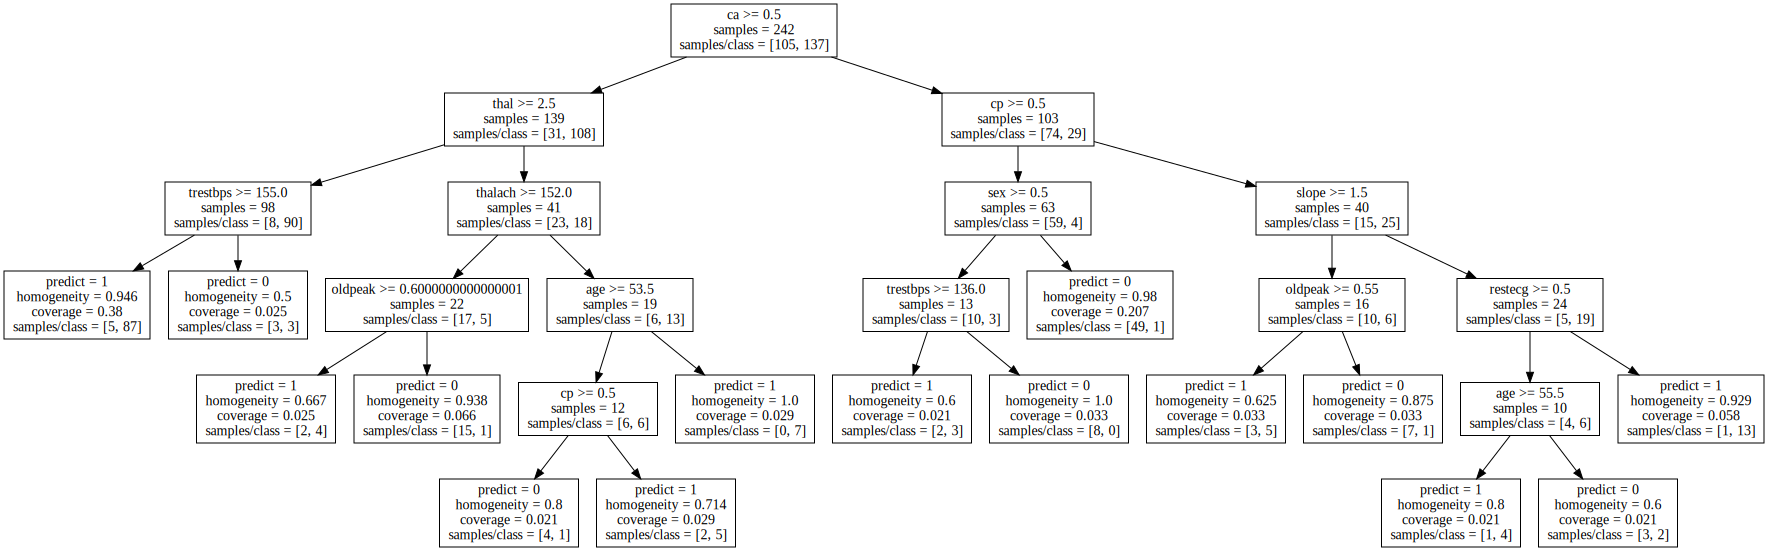

In [22]:
import graphviz
graph_dir = 'graph'
node, edge = CART_gini_ins.graph.tree_to_graph(CART_gini_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [23]:
# PDF 파일 출력 #
graph_dir = 'graph'
split = 'geni'
d_set_name = '3'

tree_graph.render('{}/CART_{}_{}_test'.format(graph_dir, split,d_set_name))

'graph\\CART_geni_3_test.pdf'

## 성능 측정 ##
> CART_gini_ins.predict에 Dataframe형태의 x,y가 동시에 존재하는 train or test data와 이전에 선언한 CART_entropy_GR_tree를 넣으면, \
> predict, predict probability가 각각 생성됨 

In [24]:
# 성능측정 #
## train predict ##
train_CART_gini_all_pred, train_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(train, CART_gini_tree)

## test predict ## 
test_CART_gini_all_pred, test_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(test, CART_gini_tree)

> utils.perform_check에 train or test data의 y값, predict, probability, class의 갯수,  CLASS_DICT_를 넣으면 \
> train or test data의 [accuracy, recall, precision, f1, auc] 순으로 값이 생성 


In [25]:
# y의 name 넣기 
classes = np.unique(train['target'])

# perform_check에 순서대로 train set의 y, train_CART_entropy_GR_all_pred, 
train_CART_gini_all_met = utils.perform_check(train['target'], \
         train_CART_gini_all_pred, \
         train_CART_gini_all_pred_prob,\
         len(classes), CART_gini_ins.CLASS_DICT_)

# 
test_CART_gini_all_met = utils.perform_check(test['target'], \
         test_CART_gini_all_pred, \
         test_CART_gini_all_pred_prob, \
         len(classes), CART_gini_ins.CLASS_DICT_)

In [26]:
# [accuracy, recall, precision, f1, auc] 순
train_CART_gini_all_met

[0.8966942148760331,
 0.9343065693430657,
 0.8888888888888888,
 0.9110320284697508,
 0.9469933958985054]

In [27]:
# [accuracy, recall, precision, f1, auc] 순
test_CART_gini_all_met

[0.7704918032786885,
 0.8571428571428571,
 0.7058823529411765,
 0.7741935483870968,
 0.8106060606060606]

### [accuracy, recall, precision, f1, auc] 순

In [28]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(train_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.897, RECALL :0.934, PRECISION : 0.889, F1 : 0.911, AUC : 0.947


In [29]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(test_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.77, RECALL :0.857, PRECISION : 0.706, F1 : 0.774, AUC : 0.811


## 구현한 코드 모델과 기존 sklearn 모델과 비교하고 싶으면 아래를 참조해주세요

In [30]:
# split criterion이 gini일 때 #
from sklearn.tree import DecisionTreeClassifier

max_depth = 1000
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dtc =DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf) 

dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [31]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

C:\Users\goldlab\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


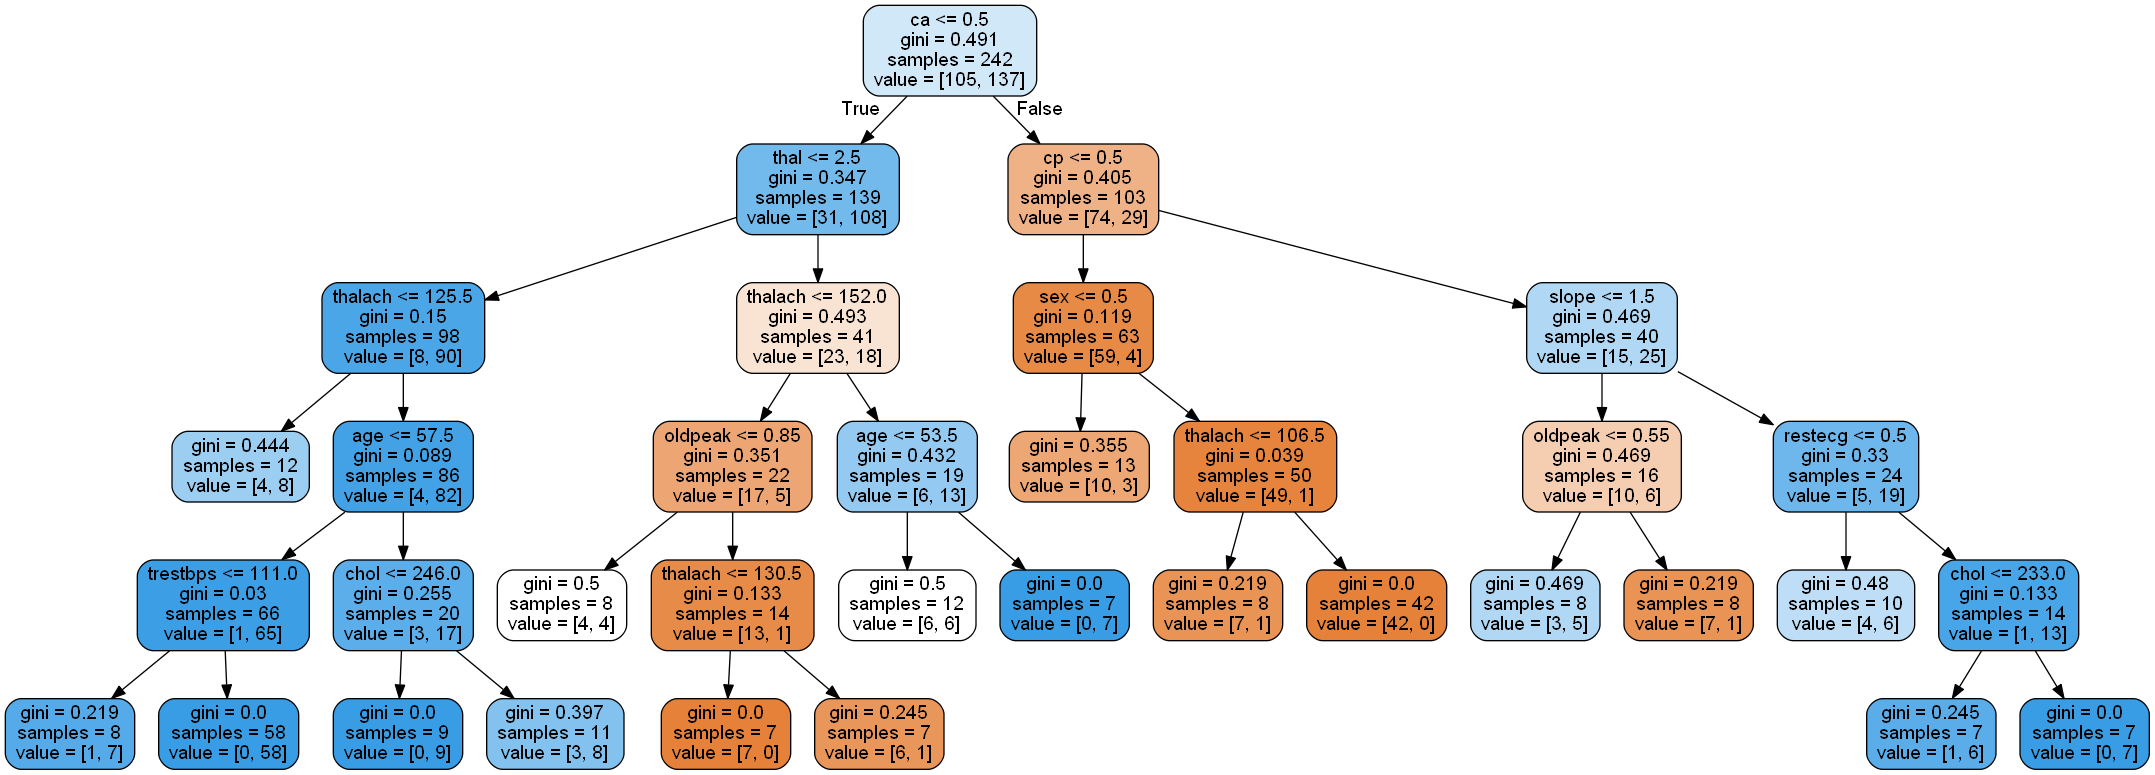

In [32]:
# 문자열 데이터를 저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(dtc, feature_names=X_train.columns, out_file = dot_file, \
                     filled =True, rounded=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())